In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [504]:
dataset = pd.read_csv('electronics.csv')

In [506]:
print(dataset.head(5))

   item_id  user_id  rating  timestamp  gender                category  year  \
0        0        0       5  6/13/1999  Female  Portable Audio & Video  1999   
1        0        1       5  6/14/1999  Female  Portable Audio & Video  1999   
2        0        2       3  6/17/1999  Female  Portable Audio & Video  1999   
3        0        3       1   7/1/1999  Female  Portable Audio & Video  1999   
4        0        4       2   7/6/1999  Female  Portable Audio & Video  1999   

   split  
0      0  
1      0  
2      0  
3      0  
4      0  


In [508]:
print(dataset.tail(10))

         item_id  user_id  rating timestamp       gender  \
1048565     6979   941853       5  2/4/2017         Male   
1048566      827   941854       5  2/4/2017         Male   
1048567     6165   941855       2  2/4/2017  Female&Male   
1048568     8569   941856       5  2/4/2017  Female&Male   
1048569     5456   941857       5  2/4/2017  Female&Male   
1048570     5884   415948       5  2/4/2017  Female&Male   
1048571     1236   941858       5  2/4/2017  Female&Male   
1048572     2031   941454       5  2/4/2017       Female   
1048573     8103   941859       5  2/4/2017  Female&Male   
1048574     6039   941860       5  2/4/2017       Female   

                        category  year  split  
1048565               Headphones  2015      0  
1048566               Home Audio  2009      0  
1048567               Home Audio  2015      0  
1048568               Headphones  2015      0  
1048569  Security & Surveillance  2014      0  
1048570  Computers & Accessories  2015      2  
104

In [510]:
print(dataset.shape)

(1048575, 8)


In [512]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   item_id    1048575 non-null  int64 
 1   user_id    1048575 non-null  int64 
 2   rating     1048575 non-null  int64 
 3   timestamp  1048575 non-null  object
 4   gender     1048575 non-null  object
 5   category   1048575 non-null  object
 6   year       1048575 non-null  int64 
 7   split      1048575 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 64.0+ MB
None


In [514]:
pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1048570   2017-02-04
1048571   2017-02-04
1048572   2017-02-04
1048573   2017-02-04
1048574   2017-02-04
Name: timestamp, Length: 1048575, dtype: datetime64[ns]

In [516]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [518]:
dataset['category'] = dataset['category'].astype(str)

In [520]:
dataset['rating'] = dataset['rating'].astype(float)

In [522]:
dataset['user_id'] = dataset['user_id'].astype(str)

In [523]:
dataset['item_id'] = dataset['item_id'].astype(str)

In [524]:
dataset.dropna(inplace=True)

In [526]:
print(dataset.describe())

             rating                      timestamp          year         split
count  1.048575e+06                        1048575  1.048575e+06  1.048575e+06
mean   4.062872e+00  2014-12-05 01:01:31.409770752  2.012688e+03  1.635172e-01
min    1.000000e+00            1999-06-13 00:00:00  1.999000e+03  0.000000e+00
25%    4.000000e+00            2014-04-21 00:00:00  2.012000e+03  0.000000e+00
50%    5.000000e+00            2015-06-05 00:00:00  2.013000e+03  0.000000e+00
75%    5.000000e+00            2016-03-04 00:00:00  2.015000e+03  0.000000e+00
max    5.000000e+00            2017-02-04 00:00:00  2.018000e+03  2.000000e+00
std    1.361620e+00                            NaN  2.670931e+00  5.318743e-01


In [530]:
print(dataset.nunique())

item_id        9490
user_id      941861
rating            5
timestamp      5753
gender            3
category         10
year             20
split             3
dtype: int64


In [532]:
print(dataset.duplicated().sum())

0


In [534]:
print(dataset.isnull().sum())

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
year         0
split        0
dtype: int64


In [536]:
print(dataset['rating'].value_counts())

rating
5.0    609417
4.0    181795
1.0    111523
3.0     82758
2.0     63082
Name: count, dtype: int64


In [538]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year
dataset['year'].value_counts().sort_index()

year
1999        47
2000       187
2001       403
2002       481
2003       833
2004      1275
2005      2170
2006      2614
2007      6798
2008      9428
2009     12804
2010     16888
2011     23894
2012     38389
2013     99855
2014    180676
2015    320887
2016    302619
2017     28327
Name: count, dtype: int64

In [540]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month
dataset['month'].value_counts().sort_index()

month
1     126018
2      82421
3      83185
4      71108
5      73532
6      73665
7      85433
8      89862
9      83759
10     83166
11     84957
12    111469
Name: count, dtype: int64

In [542]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
year         0
split        0
month        0
dtype: int64

In [544]:
dataset['rating'].value_counts().sort_index()

rating
1.0    111523
2.0     63082
3.0     82758
4.0    181795
5.0    609417
Name: count, dtype: int64

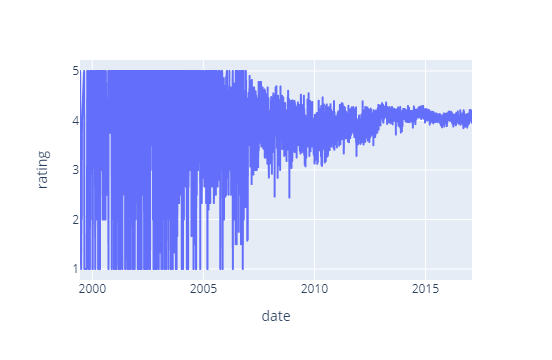

In [546]:
import plotly.express 
dataset['date'] = pd.to_datetime(dataset['timestamp'], unit='s').dt.date
avg_ratings_per_date = dataset.groupby('date')['rating'].mean().reset_index()
fig = px.line(avg_ratings_per_date, x='date', y='rating')
fig.show()

<Axes: xlabel='month', ylabel='count'>

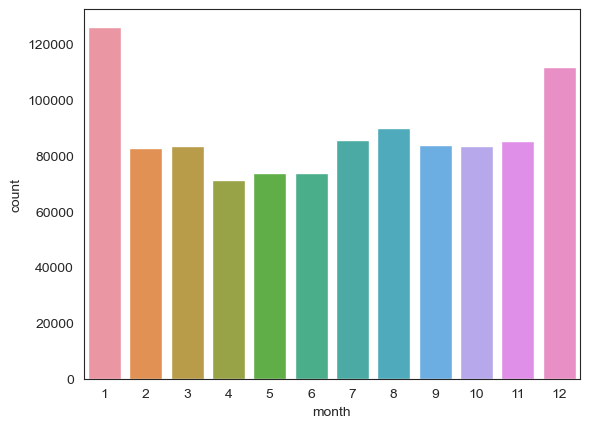

In [548]:
sns.countplot(x='month', data=dataset)

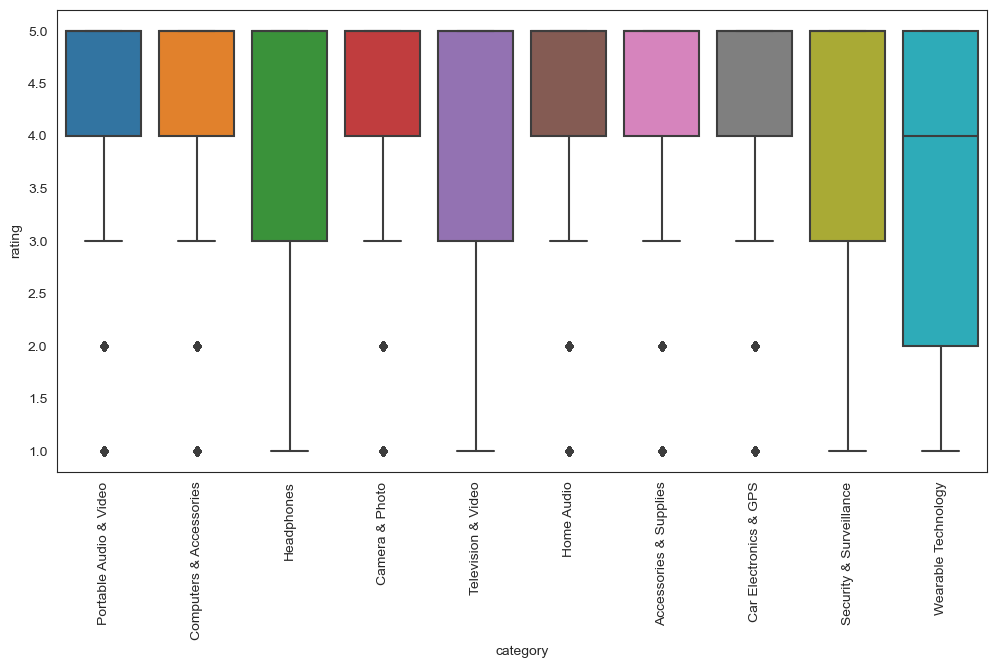

In [550]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='rating', data=dataset)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='category', ylabel='count'>

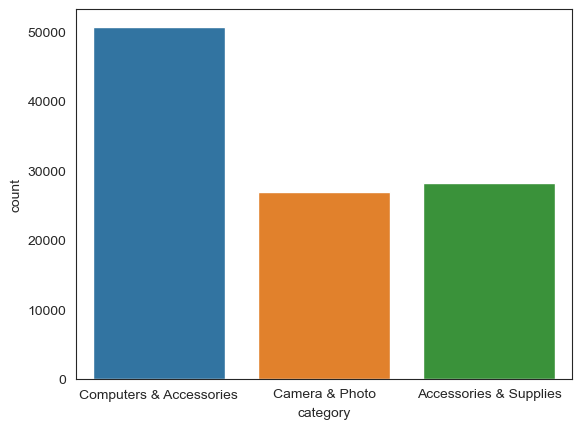

In [551]:
sns.countplot(x='category', data=dataset[dataset['year'] == 2014], order=dataset['category'].value_counts().iloc[1:4].index)

<Axes: xlabel='category', ylabel='count'>

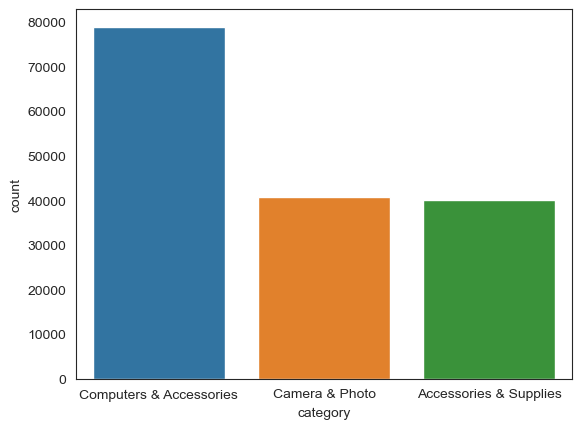

In [554]:
sns.countplot(x='category', data=dataset[dataset['year'] == 2015], order=dataset['category'].value_counts().iloc[1:4].index)

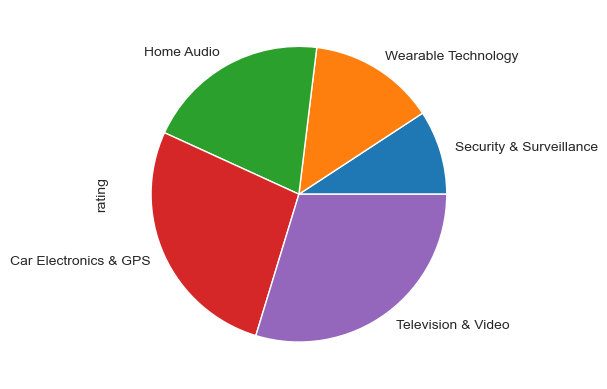

In [558]:
dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=True).head().plot(kind='pie')
sns.set_style('white')